# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [7]:
cities

['hermanus',
 'edinburgh of the seven seas',
 'hamilton',
 'qaqortoq',
 'uturoa',
 'arcot',
 'puerto natales',
 'adamstown',
 'arua',
 'blackmans bay',
 'hithadhoo',
 'ushuaia',
 'tiksi',
 'baishishan',
 'fuvahmulah',
 "nuku'alofa",
 'east london',
 'port blair',
 'waitangi',
 'szamotuly',
 'invercargill',
 'grytviken',
 'coruripe',
 "st. john's",
 'vorgashor',
 'bethel',
 'port-aux-francais',
 'avarua',
 'vingt cinq',
 'udachny',
 'joshimath',
 'lewistown',
 'sitka',
 'hami',
 'vorkuta',
 'margaret river',
 'piranshahr',
 'weyburn',
 'atafu village',
 'dudinka',
 'brigantine',
 'port mathurin',
 'constantia',
 'utrik',
 'taiohae',
 'iqaluit',
 'concordia',
 'holualoa',
 'lokken',
 'fort bragg',
 'xuanzhou',
 'fort st. john',
 'nykvarn',
 'gizo',
 'ilulissat',
 'bamako',
 'papatowai',
 'nueva gerona',
 'petawawa',
 'dazhong',
 'tiznit',
 'touros',
 'west island',
 'altamont',
 'lihue',
 'whitehorse',
 'souillac',
 'mugia',
 'el nido',
 'devinuwara',
 'new glasgow',
 'lorengau',
 'ribei

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | arcot
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | arua
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | baishishan
Processing Record 15 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 1 | nuku'alofa
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | port blair
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | szamotuly
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of S

Processing Record 41 of Set 4 | lander
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | wabag
Processing Record 45 of Set 4 | papao
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | tazovsky
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | thaba-tseka
Processing Record 0 of Set 5 | trancas
Processing Record 1 of Set 5 | bialoleka
City not found. Skipping...
Processing Record 2 of Set 5 | coihueco
Processing Record 3 of Set 5 | mili
Processing Record 4 of Set 5 | saint clair shores
Processing Record 5 of Set 5 | villa de cos
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | mingguang
Processing Record 8 of Set 5 | el sauzal de rodriguez
Processing Record 9 of Set 5 | corbin
Processing Record 10 of Set 5 | trincomalee
Processing Record 11 of Set 5 | buala
Processing Record 12 of Set 5 | tres arroyos
Processing Record 13 of Set 5 | klyuchi
Proc

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,altoona,40.5187,-78.3947,299.71,94,100,1.33,US,1721243403
1,lengshuitan,26.4111,111.5956,299.90,75,100,2.42,CN,1721243404
2,kurchum,48.5722,83.6542,292.04,71,6,1.40,KZ,1721243405
3,bredasdorp,-34.5322,20.0403,284.65,75,100,1.51,ZA,1721243226
4,yaren,-0.5472,166.9160,301.00,73,100,1.10,NR,1721243407


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

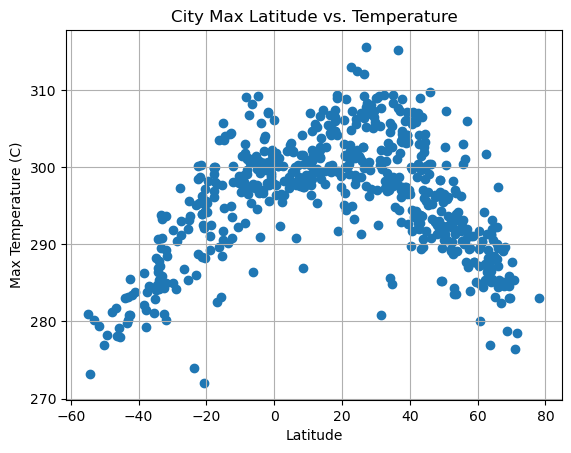

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

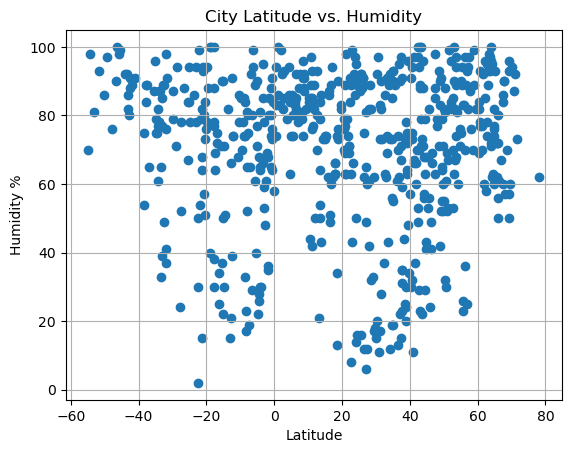

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

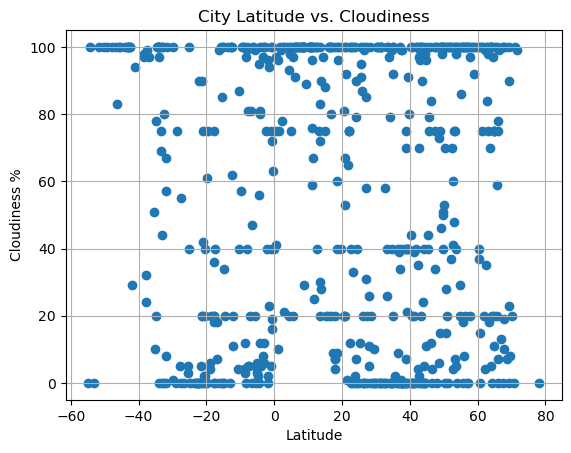

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

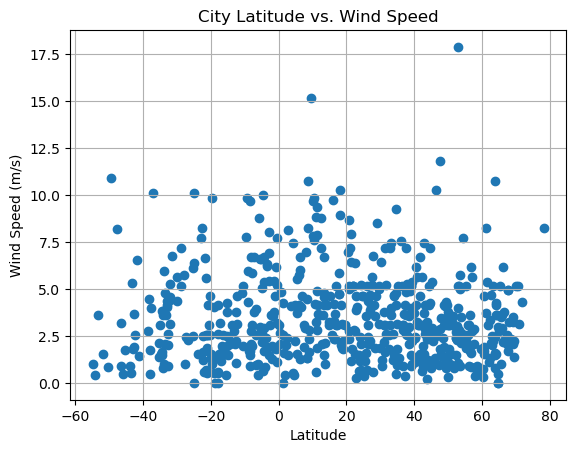

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x_values, y_values, xlabel, ylabel, title, text_coordinates):
    
    #run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regression line
    regress_values = (x_values * slope) + intercept
    
    
    
    #create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    plt.annotate((f"y = {round(slope,2)}x + {round(intercept,2)}"), text_coordinates, 
                 fontsize = 10, color = 'red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    print(f'The r^2-value is: {rvalue}')
    

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,altoona,40.5187,-78.3947,299.71,94,100,1.33,US,1721243403
1,lengshuitan,26.4111,111.5956,299.90,75,100,2.42,CN,1721243404
2,kurchum,48.5722,83.6542,292.04,71,6,1.40,KZ,1721243405
5,selfoss,63.9331,-20.9971,286.51,96,100,1.46,IS,1721243409
6,talnakh,69.4865,88.3972,282.99,60,8,1.40,RU,1721243410


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,284.65,75,100,1.51,ZA,1721243226
4,yaren,-0.5472,166.9160,301.00,73,100,1.10,NR,1721243407
8,margaret river,-33.9500,115.0667,285.38,78,97,5.98,AU,1721243412
16,grytviken,-54.2811,-36.5092,273.23,98,100,0.40,GS,1721243421
17,port-aux-francais,-49.3500,70.2167,278.24,97,100,10.93,TF,1721243422


###  Temperature vs. Latitude Linear Regression Plot

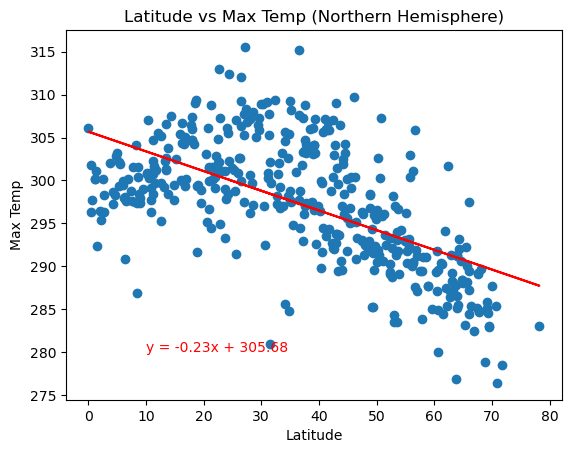

The r^2-value is: -0.6101466817119046


In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp (Northern Hemisphere)'
text_coordinates = (10,280)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

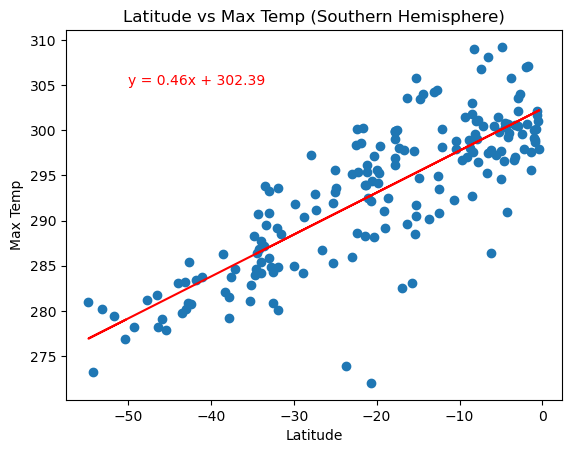

The r^2-value is: 0.814949555276556


In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp (Southern Hemisphere)'
text_coordinates = (-50,305)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** These graphs show that the further away from the equator a city is, the maximum temperature goes down.

### Humidity vs. Latitude Linear Regression Plot

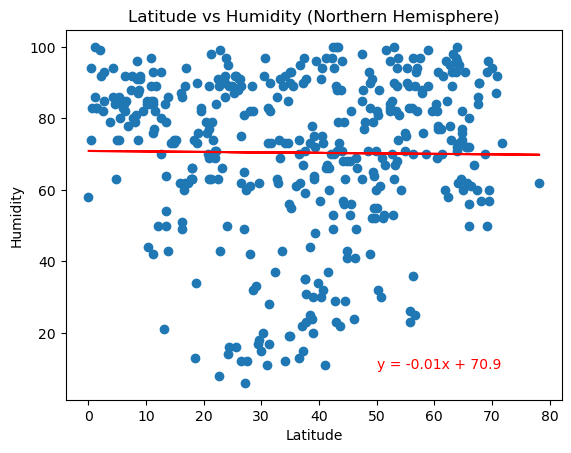

The r^2-value is: -0.0115937409920239


In [102]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity (Northern Hemisphere)'
text_coordinates = (50,10)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

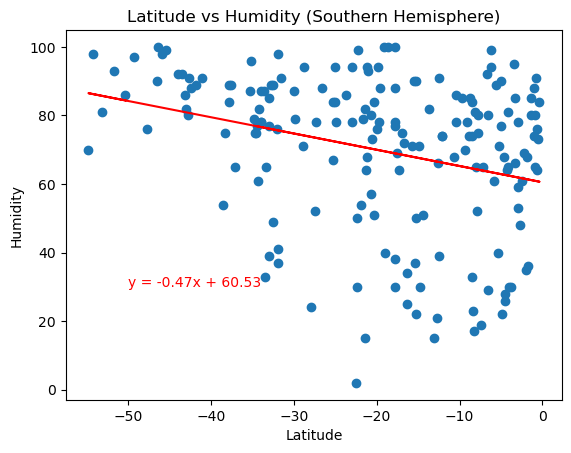

The r^2-value is: -0.298737064118061


In [104]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity (Southern Hemisphere)'
text_coordinates = (-50,30)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** These graphs suggest that the further south you go theat humidity increases, but espeically near the poles, this does not happen as much towards the north.

### Cloudiness vs. Latitude Linear Regression Plot

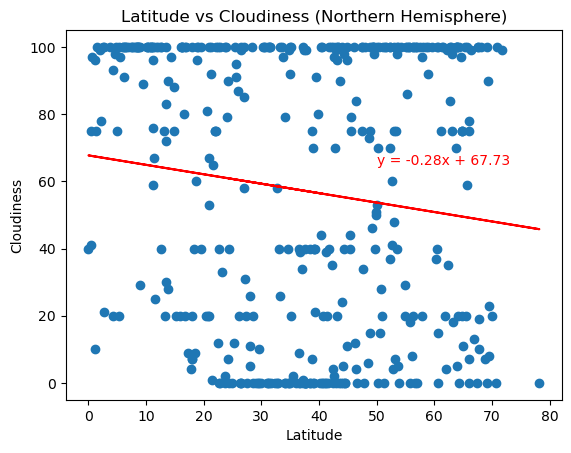

The r^2-value is: -0.13107926634772338


In [107]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness (Northern Hemisphere)'
text_coordinates = (50,65)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

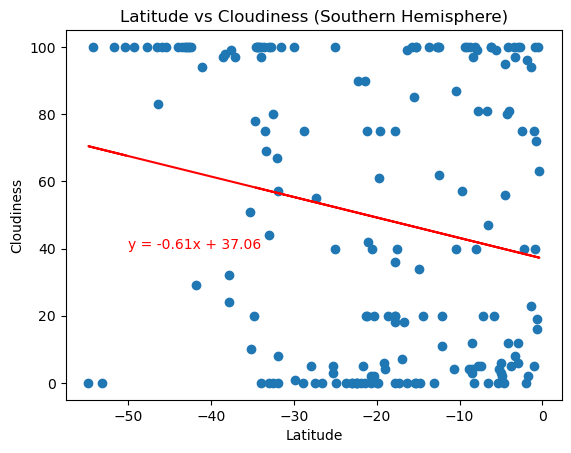

The r^2-value is: -0.20626632262484923


In [110]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness (Southern Hemisphere)'
text_coordinates = (-50,40)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

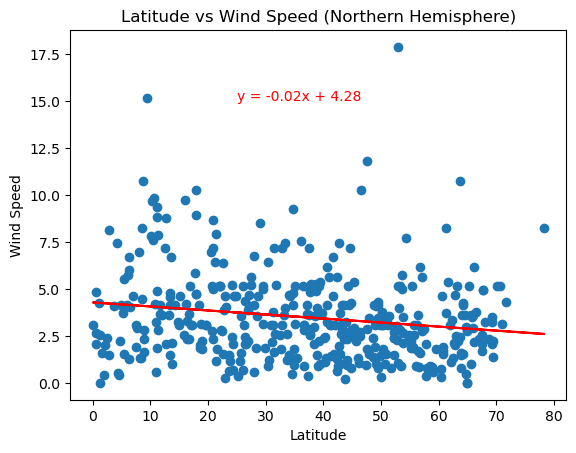

The r^2-value is: -0.17483947735162203


In [113]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed (Northern Hemisphere)'
text_coordinates = (25,15)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

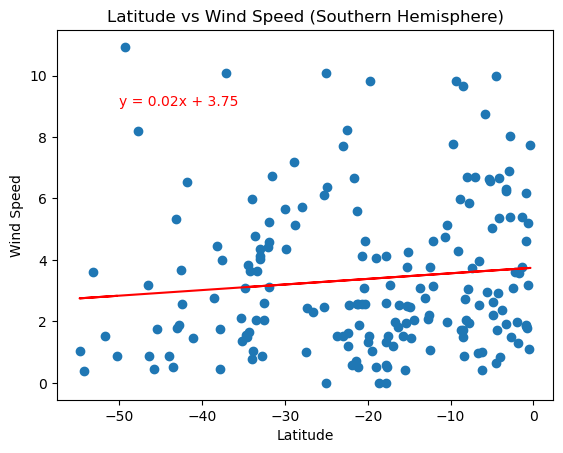

The r^2-value is: 0.10646279389154259


In [115]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed (Southern Hemisphere)'
text_coordinates = (-50,9)

plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates)

**Discussion about the linear relationship:** These graphs show that wind speed dips slightly when the city is nearer the equator, but not by a signifcant amount.